In [1]:
import tensorflow as tf
import numpy as np

In [2]:
tf.set_random_seed(777)

In [3]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

In [4]:
X = tf.placeholder(tf.float32, [None, 2], name="x")
Y = tf.placeholder(tf.float32, [None, 1], name="y")

In [5]:
with tf.name_scope("Layer1"):
    W1 = tf.Variable(tf.random_normal([2, 2]), name="weight_1")
    b1 = tf.Variable(tf.random_normal([2]), name="bias_1")
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
    #From TF graph, decide which tensors you want to log
    tf.summary.histogram("W1", W1)
    tf.summary.histogram("b1", b1)
    tf.summary.histogram("Layer1", layer1)

In [6]:
with tf.name_scope("Layer2"):
    W2 = tf.Variable(tf.random_normal([2, 1]), name="weight_2")
    b2 = tf.Variable(tf.random_normal([1]), name="bias_2")
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
    
    tf.summary.histogram("W2", W2)
    tf.summary.histogram("b2", b2)
    tf.summary.histogram("Hypothesis", hypothesis)

In [7]:
with tf.name_scope("Cost"):
    cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1 - Y)*tf.log(1-hypothesis))
    tf.summary.scalar("Cost", cost)

In [8]:
with tf.name_scope("Train"):
    train = tf.train.AdamOptimizer(learning_rate=0.1).minimize(cost)

In [9]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
tf.summary.scalar("accuracy",accuracy)

<tf.Tensor 'accuracy:0' shape=() dtype=string>

In [1]:
with tf.Session() as sess:
    #Merge all summaries
    merged_summary = tf.summary.merge_all()
    #Create writer and add graph
    writer = tf.summary.FileWriter("./logs/xor_logs_r0_01")
    writer.add_graph(sess.graph)
    
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        Run summary merge and add_summary
        _, summary, cost_val = sess.run([train, merged_summary, cost], feed_dict={X:x_data, Y:y_data})
        writer.add_summary(summary, global_step=step)
        if step % 100 == 0:
            print(step, cost_val)
            
    h, p, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print(f"\nHypothesis:\n{h} \nPredicted:\n{p} \nAccuracy:\n{a}")

NameError: name 'tf' is not defined

* cmd
* active
* tensorboard --logdir=C:\Users\wlgh3\repos\Deep_study\logs\xor_logs_r0_01

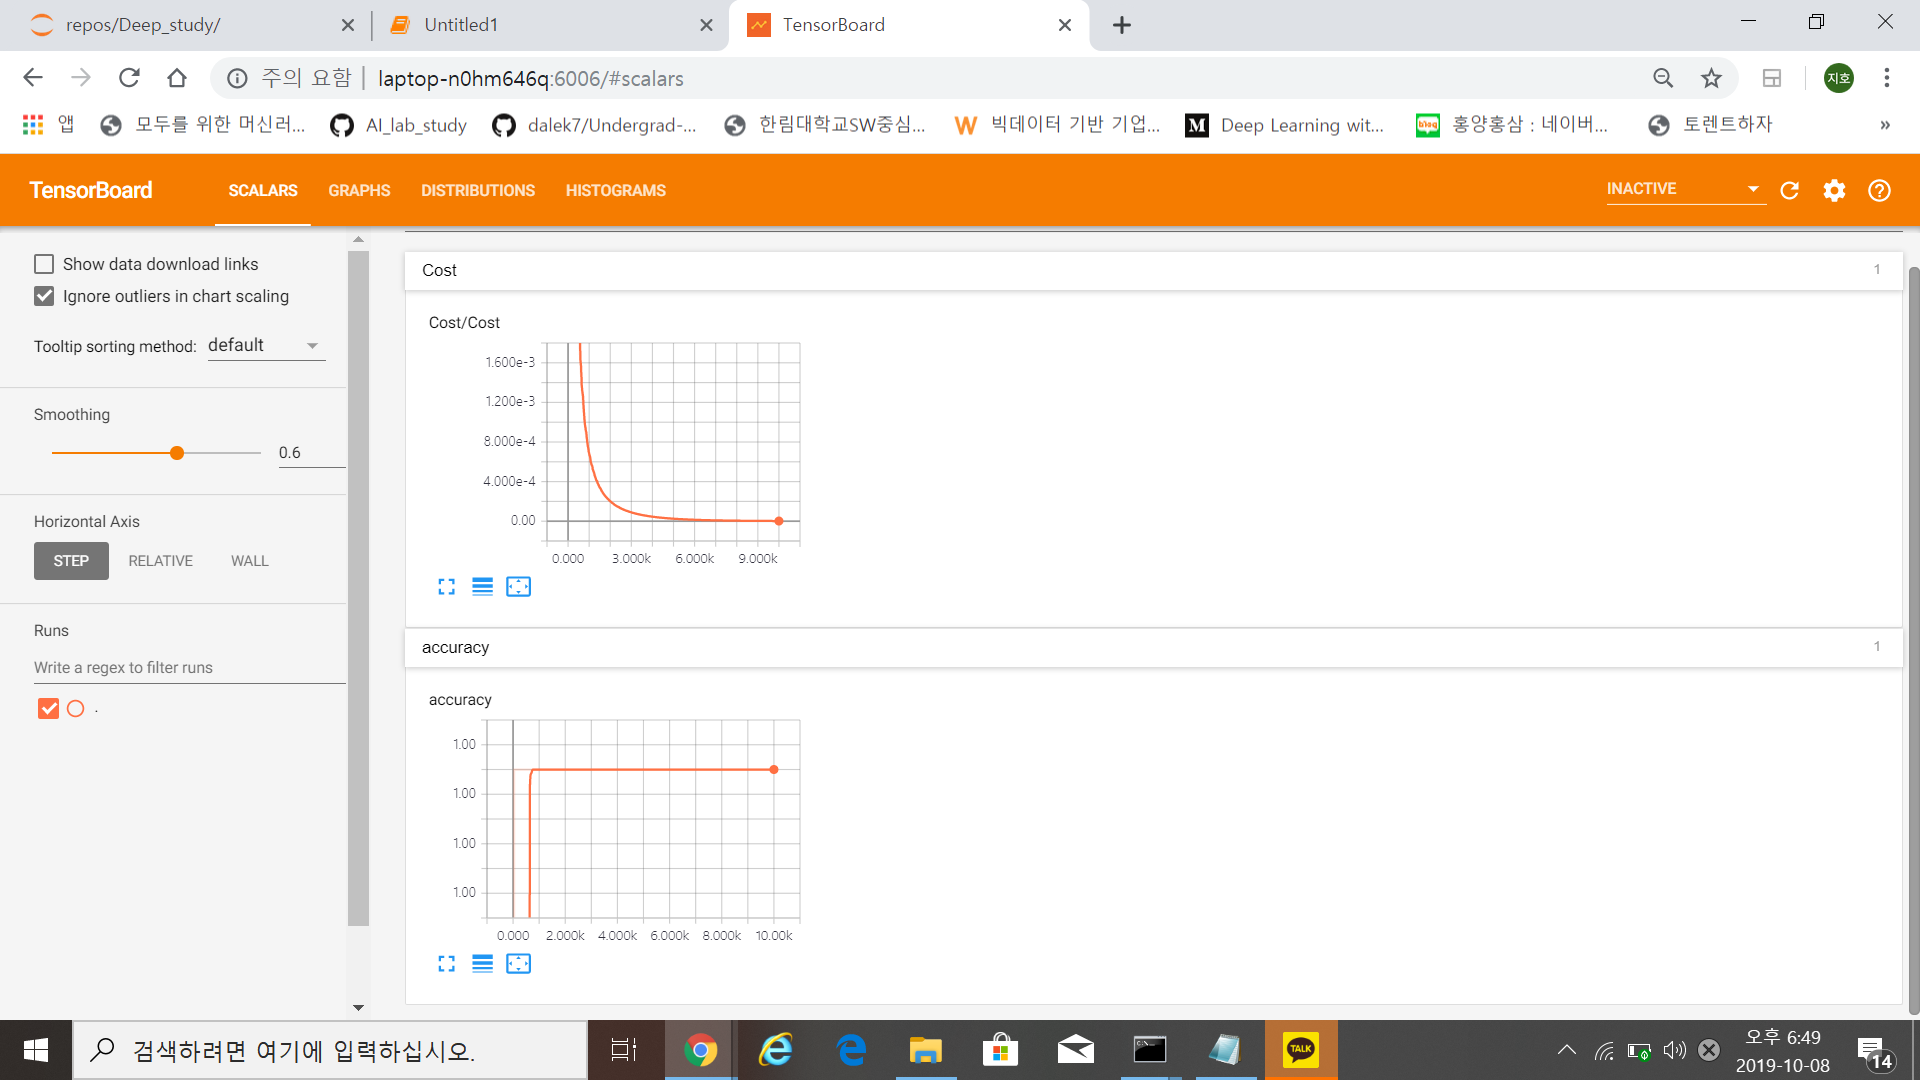